# Tutorial: Model Training / Inference based on MixedDatasets

# 0 Configure ENVS

## 0.1 Clone our repo

In [1]:
!git clone https://github.com/jichengYUAN/mmdetectionCust.git

Cloning into 'mmdetectionCust'...
remote: Enumerating objects: 1307, done.
remote: Counting objects: 100% (1307/1307), done.
remote: Compressing objects: 100% (837/837), done.
remote: Total 1307 (delta 450), reused 1306 (delta 449), pack-reused 0
Receiving objects: 100% (1307/1307), 13.54 MiB | 18.84 MiB/s, done.
Resolving deltas: 100% (450/450), done.


## 0.2 check gcc, g++ and cuda

In [2]:
!gcc --version
!g++ --version
!nvcc --version

gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

g++ (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


## 0.3 install mmcv-full and other dependencies

In [3]:
# You may need to restart your runtime after this cell, to let your installation take effect.

%cd /content/mmdetectionCust/
!pip install cython mmcv-full funcy && pip --no-cache-dir install -r requirements.txt
!python setup.py develop

/content/mmdetectionCust
     |████████████████████████████████| 307 kB 7.4 MB/s 
     |████████████████████████████████| 185 kB 47.3 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.3.11-cp37-cp37m-linux_x86_64.whl size=29363168 sha256=cfc310be0c49d0b15e37b9bdc4a67dcd817eaf356f55e085aaa26ac7f3a7d233
  Stored in directory: /root/.cache/pip/wheels/4c/8f/1d/903456a291e5bf33d99cb03cb1bbc822e2c5d32c123b873ebe
Successfully built mmcv-full
Ignoring pycocotools-windows: markers 'platform_system == "Windows"' don't match your environment
     |████████████████████████████████| 98 kB 8.4 MB/s 
     |████████████████████████████████| 472 kB 36.4 MB/s 
     |████████████████████████████████| 2.1 MB 54.1 MB/s 
     |████████████████████████████████| 73 kB 48.1 MB/s 
     |████████████████████████████████| 42 kB 33.2 MB/s 
     |████████████████████████████████| 66 kB 70.6 MB/s 
     |████████████████████████████████| 7.4 MB 16.2 MB/s 
     |████████████████████████████████| 3.8 MB 57.7 MB

running develop
running egg_info
creating mmdet.egg-info
writing mmdet.egg-info/PKG-INFO
writing dependency_links to mmdet.egg-info/dependency_links.txt
writing requirements to mmdet.egg-info/requires.txt
writing top-level names to mmdet.egg-info/top_level.txt
writing manifest file 'mmdet.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'mmdet.egg-info/SOURCES.txt'
/usr/local/lib/python3.7/dist-packages/torch/utils/cpp_extension.py:370: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
running build_ext
Creating /usr/local/lib/python3.7/dist-packages/mmdet.egg-link (link to .)
Adding mmdet 2.13.0 to easy-install.pth file

Installed /content/mmdetectionCust
Processing dependencies for mmdet==2.13.0
Searching for pycocotools==2.0.2
Best match: pycocotools 2.0.2
Adding pycoco

## 0.4 download a pretrained model if desired

In [1]:
import os
path_to_pth = '/content/mmdetectionCust/pths/focs/'
os.makedirs(path_to_pth, exist_ok=True)

%cd /content/mmdetectionCust/
!wget -P $path_to_pth https://openmmlab.oss-cn-hangzhou.aliyuncs.com/mmdetection/v2.0/fcos/fcos_r50_caffe_fpn_gn-head_1x_coco/fcos_r50_caffe_fpn_gn-head_1x_coco-821213aa.pth

/content/mmdetectionCust
--2021-08-12 16:17:39--  https://openmmlab.oss-cn-hangzhou.aliyuncs.com/mmdetection/v2.0/fcos/fcos_r50_caffe_fpn_gn-head_1x_coco/fcos_r50_caffe_fpn_gn-head_1x_coco-821213aa.pth
Resolving openmmlab.oss-cn-hangzhou.aliyuncs.com (openmmlab.oss-cn-hangzhou.aliyuncs.com)... 118.31.232.174
Connecting to openmmlab.oss-cn-hangzhou.aliyuncs.com (openmmlab.oss-cn-hangzhou.aliyuncs.com)|118.31.232.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129462725 (123M) [application/octet-stream]
Saving to: ‘/content/mmdetectionCust/pths/focs/fcos_r50_caffe_fpn_gn-head_1x_coco-821213aa.pth’

fcos_r50_caffe_fpn_ 100%[===================>] 123.46M  7.24MB/s    in 21s     

2021-08-12 16:18:02 (6.01 MB/s) - ‘/content/mmdetectionCust/pths/focs/fcos_r50_caffe_fpn_gn-head_1x_coco-821213aa.pth’ saved [129462725/129462725]



# 1 MixedDataset: Querying, Training and Testing

## 1.1 Quering a MixedDataset

In [ ]:
# import SemkgAPI

# # query from string

# # query from file

## 1.1 FakeData

In [2]:
import json
from os.path import join as opj

ROOT_PATH = '/content/mmdetectionCust/'
path_to_anno = opj(ROOT_PATH, 'testData/CocoCust/annotations/instances_train2017.json')

with open(path_to_anno, 'r') as annotations:
  anno = json.load(annotations)

categories = [category['name'] for category in anno['categories']]
number_of_categories = len(categories)

## 1.2 Split the quried MixedDatasets and check the #instances per category

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
import funcy
from tabulate import tabulate
import coloredlogs, logging
import itertools

coloredlogs.install()

def check_instances_categories(file, annotations, class_names):
    """
    #### category index should start from 1
    """
    num_classes = len(class_names)
    hist_bins = np.arange(num_classes + 1)
    histogram = np.zeros((num_classes,))
    for anno in annotations:
        classes = np.asarray(
            [anno["category_id"] - 1]
        )
        if len(classes):
            assert classes.min() >= 0, f"Got an invalid category_id={classes.min()}"
            assert (
                    classes.max() < num_classes
            ), f"Got an invalid category_id={classes.max()} for a dataset of {num_classes} classes"
        histogram += np.histogram(classes, bins=hist_bins)[0]

    N_COLS = min(6, len(class_names) * 2)

    def short_name(x):
        # make long class names shorter. useful for lvis
        if len(x) > 13:
            return x[:11] + ".."
        return x

    data = list(
        itertools.chain(*[[short_name(class_names[i]), int(v)] for i, v in enumerate(histogram)])
    )
    total_num_instances = sum(data[1::2])
    data.extend([None] * (N_COLS - (len(data) % N_COLS)))
    if num_classes > 1:
        data.extend(["total", total_num_instances])
    data = itertools.zip_longest(*[data[i::N_COLS] for i in range(N_COLS)])
    table = tabulate(
        data,
        headers=["category", "#instances"] * (N_COLS // 2),
        tablefmt="pipe",
        numalign="left",
        stralign="center",
    )
    logging.basicConfig(format='[%(asctime)s : %(message)s %(filename)s]',
                        log_colors='green', loglevel=logging.INFO)

    logging.info('\n' + '\033[92m' + 'Categories and Instances in the ' + file + ':' + '\033[96m' + '\n' + table)


def save_coco(file, images, annotations, categories):
    check_instances_categories(file, annotations, [category['name'] for category in categories])
    with open(file, 'wt') as coco:
        json.dump({'images': images, 'annotations': annotations, 'categories': categories}, coco, indent=2,
                  sort_keys=False)

def filter_annotations(annotations, images):
    image_ids = funcy.lmap(lambda i: int(i['id']), images)
    return funcy.lfilter(lambda a: int(a['image_id']) in image_ids, annotations)

def dataset_split(annotation_file, path_to_train, path_to_test, ratio):
    with open(annotation_file, 'rt') as annotations:
        coco = json.load(annotations)
        images = coco['images']
        # for image in coco["images"]:
        #     imgage=root_path+image
        
        annotations = coco['annotations']
        categories = coco['categories']

        images_with_annotations = funcy.lmap(lambda a: int(a['image_id']), annotations)
        images = funcy.lremove(lambda i: i['id'] not in images_with_annotations, images)

        train, test = train_test_split(images, train_size=ratio)

        save_coco(path_to_train, train, filter_annotations(annotations, train), categories)
        save_coco(path_to_test, test, filter_annotations(annotations, test), categories)

In [6]:
import os

path_to_anno_mixedDatasets = opj(ROOT_PATH, 'testData/mixedDataset/annotations/')
os.makedirs(path_to_anno_mixedDatasets, exist_ok=True)

path_to_train_val = opj(path_to_anno_mixedDatasets,'train_val_set.json')
path_to_train = opj(path_to_anno_mixedDatasets,'train_set.json')
path_to_val = opj(path_to_anno_mixedDatasets,'val_set.json')
path_to_test = opj(path_to_anno_mixedDatasets,'test_set.json')
ratio = 0.5

dataset_split(path_to_anno, path_to_train_val, path_to_test, ratio)
dataset_split(path_to_train_val, path_to_train, path_to_val, ratio)

2021-08-12 16:18:22 45aba55301b8 root[951] INFO 
Categories and Instances in the /content/mmdetectionCust/testData/mixedDataset/annotations/train_val_set.json:
|  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|
|    car     | 19           |   truck    | 2            |
|            |              |            |              |
|   total    | 21           |            |              |
2021-08-12 16:18:22 45aba55301b8 root[951] INFO 
Categories and Instances in the /content/mmdetectionCust/testData/mixedDataset/annotations/test_set.json:
|  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|
|    car     | 10           |   truck    | 4            |
|            |              |            |              |
|   total    | 14           |            |              |
2021-08-12 16:18:22 45aba55301b8 root[951] INFO 
Categories and Instances in the /content/mmdetectionCust

## 1.3 Training on the MixedDataset

In [7]:
%run tools/train.py \
configs/fcos/fcos_r50_caffe_fpn_gn-head_1x_mixedDataset_loadFromSeparatedFile.py \
--work-dir training_logs_example/fcos_coco_kitti_pedestrian_person_setting_bacth_4_lr_0.01/ \
--cfg-options model.bbox_head.num_classes={number_of_categories} \
data.train.ann_file={path_to_train_val} \
data.val.ann_file={path_to_train_val} \
runner.max_epochs=4 \
data.samples_per_gpu=1 \
load_from=/content/mmdetectionCust/pths/focs/fcos_r50_caffe_fpn_gn-head_1x_coco-821213aa.pth \
data.train.classes="$categories" \
data.val.classes="$categories"

2021-08-12 16:18:26 45aba55301b8 root[951] INFO Generating grammar tables from /usr/lib/python3.7/lib2to3/Grammar.txt
2021-08-12 16:18:26 45aba55301b8 root[951] INFO Generating grammar tables from /usr/lib/python3.7/lib2to3/PatternGrammar.txt
2021-08-12 16:18:36,046 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.11 (default, Jul  3 2021, 18:01:19) [GCC 7.5.0]
CUDA available: True
GPU 0: Tesla T4
CUDA_HOME: /usr/local/cuda
NVCC: Build cuda_11.0_bu.TC445_37.28845127_0
GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
PyTorch: 1.9.0+cu102
PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.1.2 (Git Hash 98be7e8afa711dc9b66c8ff3504129cb82013cdb)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runt

2021-08-12 16:18:54,491 - mmcv - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: conv1.bias, layer1.0.conv1.bias, layer1.0.conv2.bias, layer1.0.conv3.bias, layer1.0.downsample.0.bias, layer1.1.conv1.bias, layer1.1.conv2.bias, layer1.1.conv3.bias, layer1.2.conv1.bias, layer1.2.conv2.bias, layer1.2.conv3.bias, layer2.0.conv1.bias, layer2.0.conv2.bias, layer2.0.conv3.bias, layer2.0.downsample.0.bias, layer2.1.conv1.bias, layer2.1.conv2.bias, layer2.1.conv3.bias, layer2.2.conv1.bias, layer2.2.conv2.bias, layer2.2.conv3.bias, layer2.3.conv1.bias, layer2.3.conv2.bias, layer2.3.conv3.bias, layer3.0.conv1.bias, layer3.0.conv2.bias, layer3.0.conv3.bias, layer3.0.downsample.0.bias, layer3.1.conv1.bias, layer3.1.conv2.bias, layer3.1.conv3.bias, layer3.2.conv1.bias, layer3.2.conv2.bias, layer3.2.conv3.bias, layer3.3.conv1.bias, layer3.3.conv2.bias, layer3.3.conv3.bias, layer3.4.conv1.bias, layer3.4.conv2.bias, layer3.4.conv3.bias, layer3.5.conv1


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


2021-08-12 16:19:06,282 - mmdet - INFO - load checkpoint from /content/mmdetectionCust/pths/focs/fcos_r50_caffe_fpn_gn-head_1x_coco-821213aa.pth
2021-08-12 16:19:06 45aba55301b8 mmdet[951] INFO load checkpoint from /content/mmdetectionCust/pths/focs/fcos_r50_caffe_fpn_gn-head_1x_coco-821213aa.pth
2021-08-12 16:19:06,291 - mmdet - INFO - Use load_from_local loader
2021-08-12 16:19:06 45aba55301b8 mmdet[951] INFO Use load_from_local loader
2021-08-12 16:19:06,418 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for bbox_head.conv_cls.weight: copying a param with shape torch.Size([80, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([2, 256, 3, 3]).
size mismatch for bbox_head.conv_cls.bias: copying a param with shape torch.Size([80]) from checkpoint, the shape in current model is torch.Size([2]).
2021-08-12 16:19:06 45aba55301b8 mmdet[951] WARNING The model and loaded state dict do not match exactly

size mismatch for bbox_head.

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
2021-08-12 16:19:16,385 - mmdet - INFO - Saving checkpoint at 1 epochs
2021-08-12 16:19:16 45aba55301b8 mmdet[951] INFO Saving checkpoint at 1 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 4/4, 6.5 task/s, elapsed: 1s, ETA:     0s

2021-08-12 16:19:17,718 - mmdet - INFO - Evaluating bbox...
2021-08-12 16:19:17 45aba55301b8 mmdet[951] INFO Evaluating bbox...
2021-08-12 16:19:17,725 - mmdet - ERROR - The testing results of the whole dataset is empty.
2021-08-12 16:19:17 45aba55301b8 mmdet[951] ERROR The testing results of the whole dataset is empty.
2021-08-12 16:19:17,730 - mmdet - INFO - Exp name: fcos_r50_caffe_fpn_gn-head_1x_mixedDataset_loadFromSeparatedFile.py
2021-08-12 16:19:17 45aba55301b8 mmdet[951] INFO Exp name: fcos_r50_caffe_fpn_gn-head_1x_mixedDataset_loadFromSeparatedFile.py
2021-08-12 16:19:17,734 - mmdet - INFO - Epoch(val) [1][4]	
2021-08-12 16:19:17 45aba55301b8 mmdet[951] INFO Epoch(val) [1][4]	


Loading and preparing results...


2021-08-12 16:19:20,495 - mmdet - INFO - Exp name: fcos_r50_caffe_fpn_gn-head_1x_mixedDataset_loadFromSeparatedFile.py
2021-08-12 16:19:20 45aba55301b8 mmdet[951] INFO Exp name: fcos_r50_caffe_fpn_gn-head_1x_mixedDataset_loadFromSeparatedFile.py
2021-08-12 16:19:20,503 - mmdet - INFO - Epoch(val) [1][4]	loss_cls: 1.0435, loss_bbox: 0.2293, loss_centerness: 0.5746, loss: 1.8475
2021-08-12 16:19:20 45aba55301b8 mmdet[951] INFO Epoch(val) [1][4]	loss_cls: 1.0435, loss_bbox: 0.2293, loss_centerness: 0.5746, loss: 1.8475
2021-08-12 16:19:23,849 - mmdet - INFO - Saving checkpoint at 2 epochs
2021-08-12 16:19:23 45aba55301b8 mmdet[951] INFO Saving checkpoint at 2 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 4/4, 6.7 task/s, elapsed: 1s, ETA:     0s

2021-08-12 16:19:25,097 - mmdet - INFO - Evaluating bbox...
2021-08-12 16:19:25 45aba55301b8 mmdet[951] INFO Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...


2021-08-12 16:19:25,130 - mmdet - INFO - Exp name: fcos_r50_caffe_fpn_gn-head_1x_mixedDataset_loadFromSeparatedFile.py
2021-08-12 16:19:25 45aba55301b8 mmdet[951] INFO Exp name: fcos_r50_caffe_fpn_gn-head_1x_mixedDataset_loadFromSeparatedFile.py
2021-08-12 16:19:25,134 - mmdet - INFO - Epoch(val) [2][4]	bbox_mAP: 0.2890, bbox_mAP_50: 0.3820, bbox_mAP_75: 0.3820, bbox_mAP_s: 0.0390, bbox_mAP_m: 0.5430, bbox_mAP_l: -1.0000, bbox_mAP_copypaste: 0.289 0.382 0.382 0.039 0.543 -1.000
2021-08-12 16:19:25 45aba55301b8 mmdet[951] INFO Epoch(val) [2][4]	bbox_mAP: 0.2890, bbox_mAP_50: 0.3820, bbox_mAP_75: 0.3820, bbox_mAP_s: 0.0390, bbox_mAP_m: 0.5430, bbox_mAP_l: -1.0000, bbox_mAP_copypaste: 0.289 0.382 0.382 0.039 0.543 -1.000


DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.289
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.382
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.382
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.039
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.543
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.313
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.313
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.313
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.037
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.568
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = -1.000


2021-08-12 16:19:27,902 - mmdet - INFO - Exp name: fcos_r50_caffe_fpn_gn-head_1x_mixedDataset_loadFromSeparatedFile.py
2021-08-12 16:19:27 45aba55301b8 mmdet[951] INFO Exp name: fcos_r50_caffe_fpn_gn-head_1x_mixedDataset_loadFromSeparatedFile.py
2021-08-12 16:19:27,910 - mmdet - INFO - Epoch(val) [2][4]	loss_cls: 0.7858, loss_bbox: 0.1901, loss_centerness: 0.5750, loss: 1.5509
2021-08-12 16:19:27 45aba55301b8 mmdet[951] INFO Epoch(val) [2][4]	loss_cls: 0.7858, loss_bbox: 0.1901, loss_centerness: 0.5750, loss: 1.5509
2021-08-12 16:19:31,229 - mmdet - INFO - Saving checkpoint at 3 epochs
2021-08-12 16:19:31 45aba55301b8 mmdet[951] INFO Saving checkpoint at 3 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 4/4, 6.6 task/s, elapsed: 1s, ETA:     0s

2021-08-12 16:19:32,470 - mmdet - INFO - Evaluating bbox...
2021-08-12 16:19:32 45aba55301b8 mmdet[951] INFO Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-08-12 16:19:32,561 - mmdet - INFO - Exp name: fcos_r50_caffe_fpn_gn-head_1x_mixedDataset_loadFromSeparatedFile.py
2021-08-12 16:19:32 45aba55301b8 mmdet[951] INFO Exp name: fcos_r50_caffe_fpn_gn-head_1x_mixedDataset_loadFromSeparatedFile.py
2021-08-12 16:19:32,565 - mmdet - INFO - Epoch(val) [3][4]	bbox_mAP: 0.5840, bbox_mAP_50: 0.7170, bbox_mAP_75: 0.7070, bbox_mAP_s: 0.3710, bbox_mAP_m: 0.8340, bbox_mAP_l: -1.0000, bbox_mAP_copypaste: 0.584 0.717 0.707 0.371 0.834 -1.000
2021-08-12 16:19:32 45aba55301b8 mmdet[951] INFO Epoch(val) [3][4]	bbox_mAP: 0.5840, bbox_mAP_50: 0.7170, bbox_mAP_75: 0.7070, bbox_mAP_s: 0.3710, bbox_mAP_m: 0.8340, bbox_mAP_l: -1.0000, bbox_mAP_copypaste: 0.584 0.717 0.707 0.371 0.834 -1.000


DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.584
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.717
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.707
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.371
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.834
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.747
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.747
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.747
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.613
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.859
 Average Recall     (AR) @[ IoU=0.50:0.95 | 

2021-08-12 16:19:35,354 - mmdet - INFO - Exp name: fcos_r50_caffe_fpn_gn-head_1x_mixedDataset_loadFromSeparatedFile.py
2021-08-12 16:19:35 45aba55301b8 mmdet[951] INFO Exp name: fcos_r50_caffe_fpn_gn-head_1x_mixedDataset_loadFromSeparatedFile.py
2021-08-12 16:19:35,362 - mmdet - INFO - Epoch(val) [3][4]	loss_cls: 0.3527, loss_bbox: 0.1393, loss_centerness: 0.5718, loss: 1.0637
2021-08-12 16:19:35 45aba55301b8 mmdet[951] INFO Epoch(val) [3][4]	loss_cls: 0.3527, loss_bbox: 0.1393, loss_centerness: 0.5718, loss: 1.0637
2021-08-12 16:19:38,666 - mmdet - INFO - Saving checkpoint at 4 epochs
2021-08-12 16:19:38 45aba55301b8 mmdet[951] INFO Saving checkpoint at 4 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 4/4, 6.5 task/s, elapsed: 1s, ETA:     0s

2021-08-12 16:19:39,918 - mmdet - INFO - Evaluating bbox...
2021-08-12 16:19:39 45aba55301b8 mmdet[951] INFO Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-08-12 16:19:40,004 - mmdet - INFO - Exp name: fcos_r50_caffe_fpn_gn-head_1x_mixedDataset_loadFromSeparatedFile.py
2021-08-12 16:19:40 45aba55301b8 mmdet[951] INFO Exp name: fcos_r50_caffe_fpn_gn-head_1x_mixedDataset_loadFromSeparatedFile.py
2021-08-12 16:19:40,010 - mmdet - INFO - Epoch(val) [4][4]	bbox_mAP: 0.6370, bbox_mAP_50: 0.9340, bbox_mAP_75: 0.8600, bbox_mAP_s: 0.6590, bbox_mAP_m: 0.6620, bbox_mAP_l: -1.0000, bbox_mAP_copypaste: 0.637 0.934 0.860 0.659 0.662 -1.000
2021-08-12 16:19:40 45aba55301b8 mmdet[951] INFO Epoch(val) [4][4]	bbox_mAP: 0.6370, bbox_mAP_50: 0.9340, bbox_mAP_75: 0.8600, bbox_mAP_s: 0.6590, bbox_mAP_m: 0.6620, bbox_mAP_l: -1.0000, bbox_mAP_copypaste: 0.637 0.934 0.860 0.659 0.662 -1.000


DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.637
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.934
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.860
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.659
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.662
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.695
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.695
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.695
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.694
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.682
 Average Recall     (AR) @[ IoU=0.50:0.95 | 

2021-08-12 16:19:42,751 - mmdet - INFO - Exp name: fcos_r50_caffe_fpn_gn-head_1x_mixedDataset_loadFromSeparatedFile.py
2021-08-12 16:19:42 45aba55301b8 mmdet[951] INFO Exp name: fcos_r50_caffe_fpn_gn-head_1x_mixedDataset_loadFromSeparatedFile.py
2021-08-12 16:19:42,754 - mmdet - INFO - Epoch(val) [4][4]	loss_cls: 0.2864, loss_bbox: 0.2107, loss_centerness: 0.5721, loss: 1.0691
2021-08-12 16:19:42 45aba55301b8 mmdet[951] INFO Epoch(val) [4][4]	loss_cls: 0.2864, loss_bbox: 0.2107, loss_centerness: 0.5721, loss: 1.0691


## 1.4 Testing on the MixedDataset

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Use load_from_local loader
[                                                  ] 0/4, elapsed: 0s, ETA:

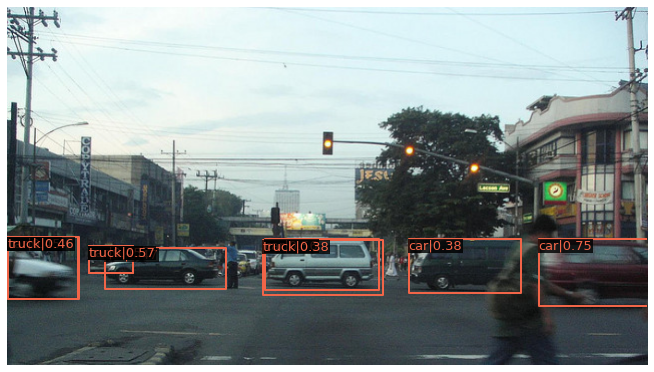

[>>>>>>>>                           ] 1/4, 1.3 task/s, elapsed: 1s, ETA:     2s

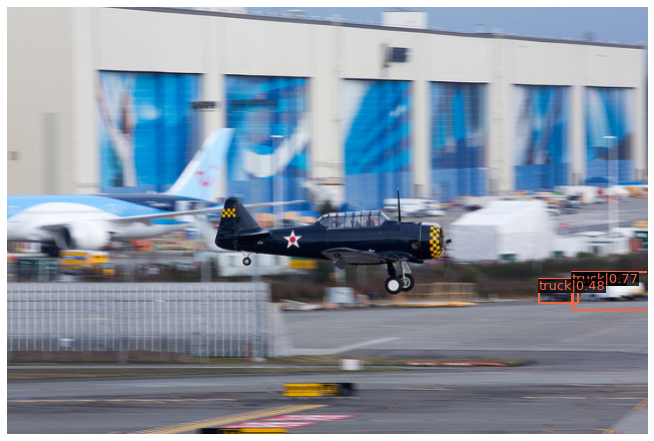

[>>>>>>>>>>>>>>>>>                  ] 2/4, 1.6 task/s, elapsed: 1s, ETA:     1s

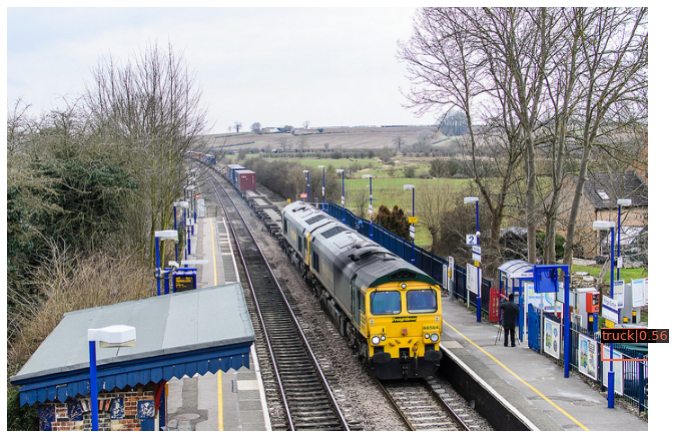

[>>>>>>>>>>>>>>>>>>>>>>>>>>         ] 3/4, 1.7 task/s, elapsed: 2s, ETA:     1s

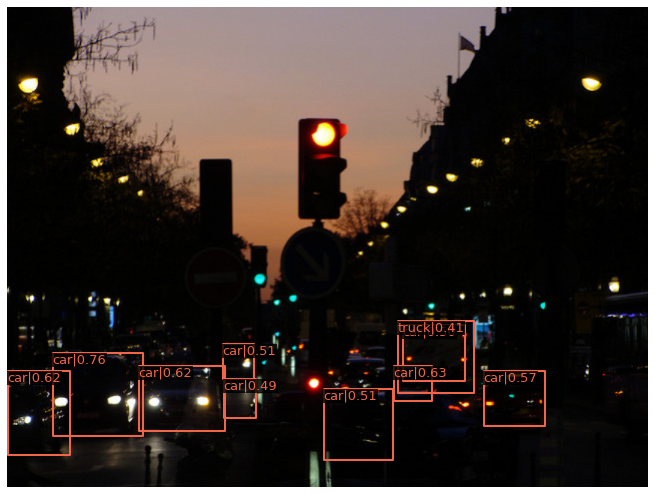

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 4/4, 1.8 task/s, elapsed: 2s, ETA:     0s
writing results to training_logs_example/fcos_coco_kitti_pedestrian_person_setting_bacth_4_lr_0.01/result_test.pkl

Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.637
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.934
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.860
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.659
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.662
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.695
 Averag

In [8]:
%run tools/test.py \
configs/fcos/fcos_r50_caffe_fpn_gn-head_1x_mixedDataset_loadFromSeparatedFile.py \
training_logs_example/fcos_coco_kitti_pedestrian_person_setting_bacth_4_lr_0.01/latest.pth \
--work-dir training_logs_example/fcos_coco_kitti_pedestrian_person_setting_bacth_4_lr_0.01/ \
--out training_logs_example/fcos_coco_kitti_pedestrian_person_setting_bacth_4_lr_0.01/result_test.pkl \
--cfg-options data.test.ann_file={path_to_train_val} \
model.bbox_head.num_classes={number_of_categories} \
data.samples_per_gpu=1 \
data.test.classes="$categories" \
--eval bbox \
--show